# Will the water overflow? 


The water depth $H(t)$ in a reservoir filled by a constant flux discharge $P$ and emptied by a flux discharge $Q=-\alpha \, H$ (porous media), obeys to the model
$$ \dot H = -\alpha \, H  +P$$ 
that converges to the stationnary state $H_e =P/\alpha$, given any intial condition $H(0)=H_0$.

We choose $\underline x = (\alpha, P, H_0)^T$ as the control space and $\underline y={\cal G}(\underline x) = [H(t_1), H(t_2)...H(t_K)]^T$ as the observation taken at different times $t_1, t_2...t_K$, where 
$$ H(t) = {P\over \alpha} \left(1 -e^{-\alpha t}\right)+ H_0 \,e^{-\alpha t} $$
 is the analytic solution. 

We denote by $\sigma_\alpha$, $\sigma_P$ and $\sigma_{H_0}$ the standard deviations of the error $\epsilon_\alpha$, $\epsilon_P$ and $\epsilon_{H_0}$ of the background components and we suppose a correlation $\rho = {<\epsilon_\alpha \, \epsilon_P> \over \sigma_\alpha\, \sigma_P}$. We denote by $\sigma_r$ the standard deviation of the uncorrelated measurements errors.

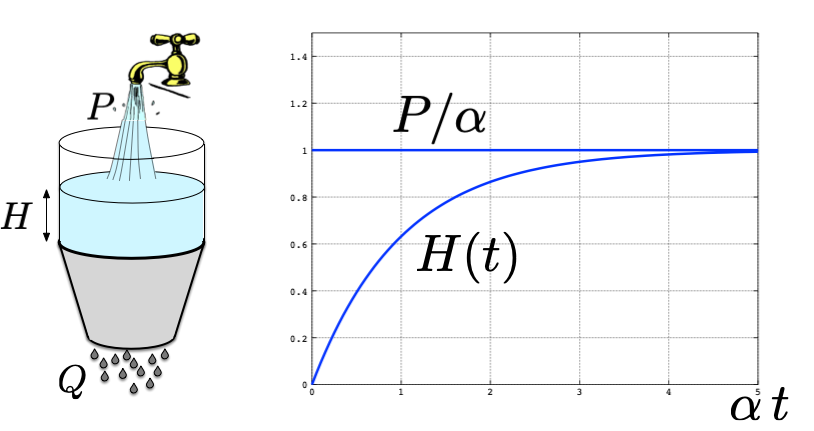

The analysis $x^a$ is the state that minimizes the cost function $J(\underline x) = J_b(\underline x) + J_r(\underline x)$ where
$$ J_b(\underline x) = {1\over 2} \underline x^t \;\underline{\underline B}^{-1}\; \underline x \quad \hbox{and} \quad  J_r(\underline x) = {1\over 2} \sum_{k=1}^K {[y^o_k - {\cal G}_k(\underline x)]^2 \over \sigma_r^2}\;.$$

The cost function is approximated here by the incremental cost function $J_{inc}(\underline x)$. We define a true state $\underline x^t$ with a true observation $\underline y^t={\cal G}(\underline x^t)$ and performed several twin experiments.

**References:**

*   O. Thual, "[Introduction to Data Assimilation for Scientists and Engineers](http://pedagotech.inp-toulouse.fr/130202/co/module_idase.html)", Open Learn. Res. Ed. INP 0202 (2013) 6h


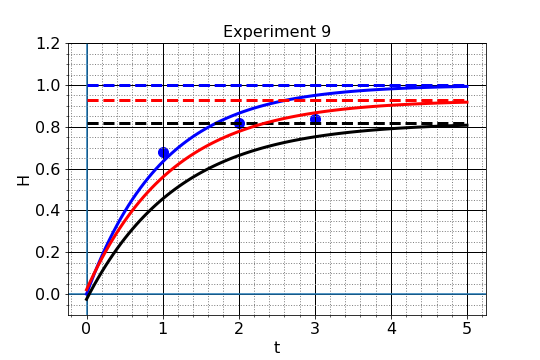

# Compilation of the subroutines

Execute first the code below to define the functions!

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

def inifig(xdim=7.5,ydim=5):
    # Standard figure initialization with grids
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)            

def inifigold(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
        
def cG_nol(x):
    # Observation operator
    al=x[0,0]; P=x[1,0]; H0=x[2,0]
    y=(H0-P/al)*np.exp(-al*tobs)+P/al
    y=y.reshape(nobs,1)
    return y

def G_lin(x):
    # Lienarized observation operator
    al=x[0,0]; P=x[1,0]; H0=x[2,0]
    exp=np.exp(-al*tobs); Psal=P/al
    dGdal=(-(H0-Psal)*tobs+Psal**2)*exp-Psal**2
    dGdP=(1-exp)/al
    dGdH0=exp
    G=np.array([dGdal.T, dGdP.T, dGdH0.T]).T
    return G
    
def Jb_cost(x):
    # Background cost function
    Jb=(x-xb).T.dot(Binv).dot(x-xb)
    return Jb  
 
def Jr_cost(x):
    # Observation cost function
    Jr=sum(yo-cG_nol(x))**2/(2*sigr**2)
    return Jr

def J_cost(x):
    # Cost function
    return Jb_cost(x)+Jr_cost(x)

def Jrinc_cost(x):
    # Observation part of the incremental cost function 
    d=yo-cG_nol(xb); G=G_lin(xb)
    Jrinc=sum(d-G@(x-xb))**2/(2*sigr**2)
    return Jrinc

def Jinc_cost(x):
    # Incremental cost function
    return Jb_cost(x)+Jrinc_cost(x)


def Traj(x):
    # Evolution of the water level with time
    al=x[0,0]; P=x[1,0]; H0=x[2,0]
    H=(H0-P/al)*np.exp(-al*t)+P/al
    return H


# Sample experiments

The following parameters can be modified:  

*   `sigal`: The standard deviation of $\alpha^b$
*   `sigP`: The standard deviation of $P^b$
*   `sigH0`: The standard deviation of $H_0^b$
*   `rhoaP`: The correlation of the error of $\alpha^b$ and $P^b$
*   `sigr`: The standard deviation for the observations $y_k$
*   `nobs`: Number of observation $K$
*   `dt`: Time interval between two observations
*   `show_evol`: =True to visualize the experiments
*   `Iexp`: Number of experiment to plot

In [ ]:
# Parameters to change
sigal=.2; sigP=.2; sigH0=.1; # Background standard deviations
rhoaP=.0 # Background correlation between al and P in [0,1]
sigr=.1; # Measurement standar deviation 
tmax=5; nt=100; # Time to simulate in nt time steps
nobs=3; dt=1; # Number of observation every dt
show_evol=True # Plot the trajectories
Iexp=9 # Number of graphics to plot
ext=".png" # Figure format ".png" or ".pdf"

# Other parameters 
alt=1; Pt=1; H0t=0; # True state pqrameters
Hmin=-.1*Pt/alt; Hmax=1.2*Pt/alt # Limits for the plots

# Derived parameters
t=np.linspace(0,tmax,nt)
tobs=np.linspace(dt,nobs*dt,nobs)

# Build of the true state as a column vector
xt=np.array([alt,Pt,H0t]).reshape(3,1)
Ht=Traj(xt) # Time evolution for the true state
yt=cG_nol(xt) # True observations

print('True state\n',xt)
print('True measurements\n',yt)
print('Number of experiments:',Iexp,"\n")

# Figure
inifig()
plt.title('True Trajectory',fontsize=16)
plt.xlabel('t',fontsize=16 )
plt.ylabel('H',fontsize=16)
plt.axhline(0); plt.axvline(0)
plt.plot(t,Ht,linewidth=3,color='blue')
plt.scatter(tobs,yt,marker='o',color='blue',s=100)
Hlt=Pt/alt; plt.plot([0,tmax],[Hlt,Hlt],'--b',linewidth=3)
plt.show()


# B and R matrice
B11=sigal**2; B22=sigP**2; B33=sigH0**2
B12=rhoaP*sigal*sigP
B=np.array([[B11, B12,   0],\
   [B12, B22,   0 ],\
   [  0,   0, B33]])
Binv = np.linalg.inv(B) 
R=sigr**2*np.eye(nobs,nobs)
Rinv = np.linalg.inv(R) 


# Scores for the estimation of sigma_a
if show_evol :    
    for i in range(Iexp) :
        print('======= Experiment number ',i)
        
        # Background
        eps_al=np.random.normal(0,sigal)
        eps_P=np.random.normal(0,sigP)
        eps_H0=np.random.normal(0,sigH0)
        alb=alt+eps_al # Background al
        ## Background P correlated to al
        Pb=Pt+eps_P+eps_al*rhoaP*sigP/sigal 
        H0b=H0t+eps_H0 # Background H0
        ## Background state
        xb=np.array([[alb, Pb, H0b]]).reshape(3,1)
        Hb=Traj(xb) # Background trajectory
        print("Background:\n",xb)
        
        # Measurments
        yo=yt+np.random.normal(0,sigr,nobs).reshape(nobs,1)
        d=yo-cG_nol(xb) # Innovation vector
        print("Innovation:\n",d)
        
        # Analysis
        G=G_lin(xb); # Linearized observation operator
        K=B@G.T@np.linalg.inv(G@B@G.T+R)
        xa=xb+K@d
        ala=xa[0,0]; Pa=xa[1,0]; H0a=xa[2,0]
        print("Analysis:\n",xa)
        
        # Cost function 
        J=J_cost(xa)
        Jinc=Jinc_cost(xa)
        rel=(J-Jinc)/J
        print("Cost functions:\nJ=",J,"Jinc=",Jinc,"Relative error=",rel)
        
        # Plot Figure
        inifig()
        plt.title('Experiment '+str(i),fontsize=16)  
        plt.xlabel('t',fontsize=16 )
        plt.ylabel('H',fontsize=16)
        plt.axhline(0); plt.axvline(0)
        
        # True trajectory
        plt.plot(t,Ht,linewidth=3,color='blue')
        plt.scatter(tobs,yo,marker='o',color='blue',s=100)
        Hlt=Pt/alt; plt.plot([0,tmax],[Hlt,Hlt],'--b',linewidth=3)
       
        # Background
        plt.plot(t,Hb,linewidth=3,color='black')
        Hlb=Pb/alb; plt.plot([0,tmax],[Hlb,Hlb],'--k',linewidth=3)
        
        # Analysis
        H=Traj(xa); plt.plot(t,H,linewidth=3,color='red')
        Hla=Pa/ala; plt.plot([0,tmax],[Hla,Hla],'--r',linewidth=3)
        
        # Bound and save
        plt.ylim(Hmin,Hmax) 
        plt.savefig('Traj'+str(i)+ext)
        plt.show(); plt.close()
    
# Show all figures in command line model
print("Close all figures to stop the program if locked")

# Comparison between to cost function and its incremental approximation

Relative error of the order of 20% between the minima of the cost function and ist incremental approximation can be observed. A further study would be necessary to computed the error between to analyses obtained with the these two cost functions. 